<a href="https://colab.research.google.com/github/azizamirsaidova/datadive/blob/main/Covid19_Vaccination_Progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19. World Vaccination Progress**


**First Dataset: COVID-19 Vaccination Progress**
________________________________________________
Data contains the following information:

***Country*** - this is the country for which the vaccination information is provided;

***Country ISO Code***- ISO code for the country;

***Date*** *italicized text*- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;

***Total number of vaccinations*** - this is the absolute number of total immunizations in the country;

***Total number of people vaccinated*** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;

***Total number of people fully vaccinated***- this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;

***Daily vaccinations (raw)*** - for a certain data entry, the number of vaccination for that date/country;

***Daily vaccinations***- for a certain data entry, the number of vaccination for that date/country;

***Total vaccinations per hundred*** - ratio (in percent) between vaccination number and total population up to the date in the country;

***Total number of people vaccinated per hundred***- ratio (in percent) between population immunized and total population up to the date in the country;

***Total number of people fully vaccinated per hundred*** - ratio (in percent) between population fully immunized and total population up to the date in the country;

***Number of vaccinations per day*** - number of daily vaccination for that day and country;

***Daily vaccinations per million***- ratio (in ppm) between vaccination number and total population for the current date in the country;

***Vaccines used in the country***- total number of vaccines used in the country (up to date);

***Source name***- source of the information (national authority, international organization, local organization etc.);

***Source website*** - website of the source of information;
There is a second file added recently (country vaccinations by manufacturer), with the following columns:

_____________________________________________________

**Second Dataset: Vaccine manufacturer information**

____________________________________________________

**Location**- country;

***Date***- date;

**Vaccine** - vaccine type

**Total number of vaccinations**- total number of vaccinations / current time and vaccine type.

**Questions:**

1. ***What country has vaccinated more people?***
2. ***What vaccination schemes (combination of vaccines) are used and in which countries?***
3. ***What is the vaccine used in the largest number of countries?***

**Upload Packages:**

In [1]:
import pandas as pd 
import seaborn as sns
import missingno as msno
%matplotlib inline
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

In [2]:
#Update pandas
! pip install pandas==1.2.4

In [3]:
#Install profiling for descriptive analysis report
! pip install pandas-profiling

In [4]:
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

**Read Datasets:** Read Country Vaccinations and Manufacturer Information

In [5]:
vaccine = pd.read_csv("/content/country_vaccinations.csv")
man = pd.read_csv("/content/country_vaccinations_by_manufacturer.csv")

**Format:** Format date to datetime, and get the unique values for country and vaccine types.

In [6]:
#Formating the datetime
vaccine['date'] = pd.to_datetime(vaccine['date'], format = '%Y-%m-%d')

#Since there are duplicate country names, let's get the all unique country names from the columns
countries = list(vaccine['country'].unique())

#Vaccine types 
vaccine_types = list(vaccine['vaccines'].unique())

**Extract Report:** Using Country Vaccination dataset extract report  

In [39]:
report_vaccine = ProfileReport(vaccine)
report_vaccine

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Insights:**


*   Distinct variables are country and ISO code.
*   Date: from December 14, 2020 to April 25, 2021
*   Missing Values: 
    * total vaccinations for 40.6 percent
    * people vaccinated for 45.8 percent
    * people fully vaccinated for 60.4 percent
    * daily vaccinations raw for 50.4 percent
    * daily vaccinations for 1.5 percent
    * total vaccinations per hundred for 40.6 percent
    * people vaccinated per hundred for 45.8 percent
    * people fully vaccinated for 60.4 percent
    * daily vaccinations per hundred for 1.5 percent
*   Correlation: Obviously, fully vaccinated per hundred has a corellations with fully vaccinated per hundred




Missing Values in matrix


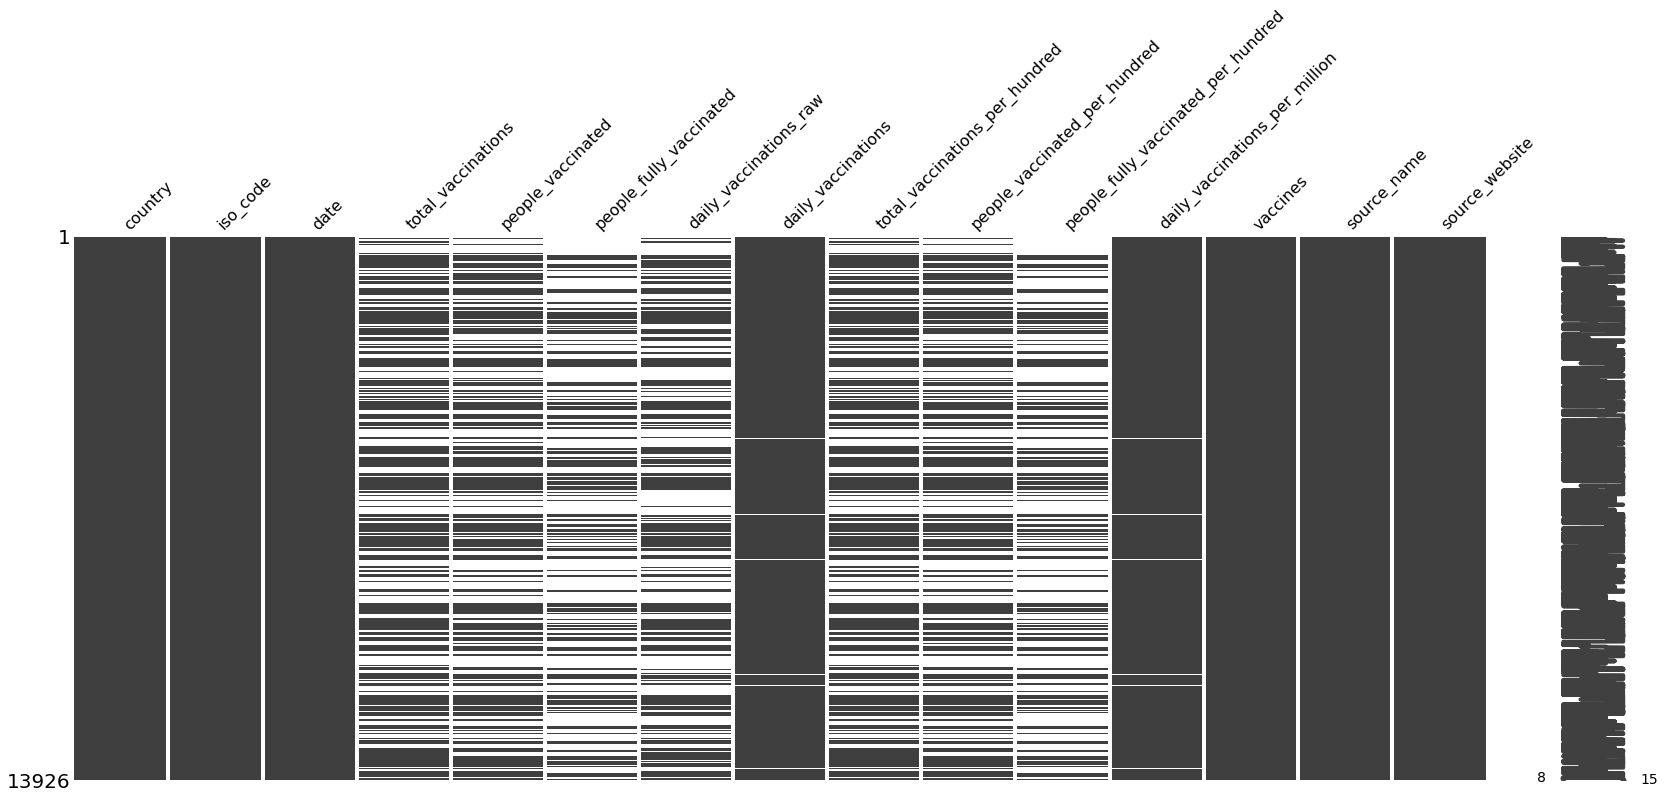

In [8]:
print("Missing Values in matrix")
msno.matrix(vaccine)

**Dealing with missing values:** Since we can't use any imputations to fill the missing values. We drop the rows with null values. 

In [9]:
print("Number of rows before dropping missing values: ", vaccine.shape[0])
print("___________________________________________________")
vaccine.dropna(inplace=True)
print("Number of rows after dropping missing values: ", vaccine.shape[0])
print("___________________________________________________")
vaccine.isnull().sum()

Number of rows before dropping missing values:  13926
___________________________________________________
Number of rows after dropping missing values:  4892
___________________________________________________


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

**Exploratory Data Analysis:**



In [10]:
#Raw analysis of the daily vacciations for top 5 countries
vaccine.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False)[:5]

country
India             3659357.0
United States     3384387.0
Brazil            1135847.0
United Kingdom     602266.0
Germany            533317.0
Name: daily_vaccinations, dtype: float64

In [11]:
#Dataframe for daily vaccinations
daily_vaccine = vaccine[['country', 'date', 'vaccines', 'daily_vaccinations']]

#Total number of daily vaccinations per country
daily_vaccine_sum = daily_vaccine.groupby('country').daily_vaccinations.sum()
daily_vaccine_sum = pd.DataFrame(daily_vaccine_sum )
daily_vaccine_sum = daily_vaccine_sum.rename(columns = {"daily_vaccinations": "sum of daily vaccinations"})

#Average number of daily vaccinations per country 
daily_vaccine_mean = daily_vaccine.groupby('country').daily_vaccinations.mean().round(1)
daily_vaccine_mean = pd.DataFrame(daily_vaccine_mean )
daily_vaccine_mean = daily_vaccine_mean.rename(columns = {"daily_vaccinations": "mean of daily vaccinations"})
daily_vaccine_mean

#Create a dataframe for total and average numbers
daily_vaccine_sum = pd.merge(daily_vaccine_sum, daily_vaccine_mean, how='inner', on='country')
daily_vaccine_sum

sum of daily vaccinations  mean of daily vaccinations
country                                                              
Albania                             254.0                       254.0
Andorra                             573.0                       573.0
Argentina                       6277623.0                     72156.6
Aruba                             25379.0                      1952.2
Austria                         2643815.0                     26176.4
...                                   ...                         ...
United Kingdom                 42409745.0                    407786.0
United States                 204610061.0                   2131354.8
Uruguay                         1122063.0                     37402.1
Wales                           2271310.0                     22488.2
Zimbabwe                         299411.0                      8806.2

[100 rows x 2 columns]

In [12]:
daily_vaccine = pd.merge(daily_vaccine, daily_vaccine_sum, how='inner', on='country')
daily_vaccine

country  ... mean of daily vaccinations
0       Albania  ...                      254.0
1       Andorra  ...                      573.0
2     Argentina  ...                    72156.6
3     Argentina  ...                    72156.6
4     Argentina  ...                    72156.6
...         ...  ...                        ...
4887   Zimbabwe  ...                     8806.2
4888   Zimbabwe  ...                     8806.2
4889   Zimbabwe  ...                     8806.2
4890   Zimbabwe  ...                     8806.2
4891   Zimbabwe  ...                     8806.2

[4892 rows x 6 columns]

# **What country has vaccinated more people?**
**Trends in Worldwde Daily Vaccinations**: 
*   There is a decrease between the February and March, it might be due to Spring Break. 
*   Johnson and Johnson vaccination stopped after April 13, thus, we can see a decrease starting April 15





In [13]:
daily = pd.DataFrame(daily_vaccine.groupby('date')['daily_vaccinations'].sum())
daily = daily.reset_index()
fig = px.bar(daily, x='date', y='daily_vaccinations',width=700, height=400)
fig.show()

In [14]:
#Get the highest average daily vaccinated countries to the top from the daily vaccine dataframe
sort_vaccines_by_mean = daily_vaccine.sort_values(by = "mean of daily vaccinations", ascending=False)
countries = sum.country.to_list()
#Groupby by countries with highest highest average daily vaccination
sort_vaccines_by_mean.groupby('country')["mean of daily vaccinations"].max().sort_values(ascending=False)[:10]

country
United States     2131354.8
India             1758882.0
United Kingdom     407786.0
Brazil             405036.9
England            341199.4
Turkey             246308.8
Russia             233768.6
Germany            203421.3
France             183177.7
Indonesia          180857.1
Name: mean of daily vaccinations, dtype: float64

In [17]:
top5_new = daily_vaccine.groupby('country')['sum of daily vaccinations'].max().sort_values(ascending=False)[:5]
top5_new = pd.DataFrame(top5_new)
top5_new.reset_index(inplace=True)

**Daily Vaccinations for Top Countries:**
*   Moderate decrease in vaccination in India. Since coronavirus cases rose dramatically over the past few days, its anticipated that vaccinations dropped, as the country in complete lockdown. 
*   We can observe here problem with data collection: United Kindom == England 

In [18]:
#Sort from daily vaccine mean dataframe
sort = daily_vaccine_mean.sort_values(by = 'mean of daily vaccinations', ascending = False).reset_index()
#Create a list of those countries
countries = sort.country.to_list()
#Get the average daily vaccinated countries to the top from the mean dataframe
mean_ = daily_vaccine.sort_values(by = 'mean of daily vaccinations', ascending = False)
top5 = mean_[mean_['country'].isin(countries[:5])]

In [19]:
# work on ascdening=False for date
fig = px.bar(top5, x='date', color='country')
fig.update_layout(paper_bgcolor="snow")
fig.show()

**Top 5 countries with total vaccinations:** 
*  If England would be correctly represented, then would have the largest daily vaccinations
*  Similar data misinterpretation can be observed here in terms of UK and England 
*  Brazil has flactuations in daily vaccinations

In [20]:
#Sort from daily vaccine sum dataframe
sort_sum = daily_vaccine_sum.sort_values(by = 'sum of daily vaccinations', ascending = False).reset_index()
#Create a list of those countries
countries = sort_sum.country.to_list()
#Get the average daily vaccinated countries to the top from the mean dataframe
sum = daily_vaccine.sort_values(by = 'sum of daily vaccinations', ascending = False)
top5_sum = sum[sum['country'].isin(countries[:5])]
top10_sum = sum[sum['country'].isin(countries[:10])]

In [21]:
fig = px.bar(top5_sum, y='sum of daily vaccinations', x='country', text='sum of daily vaccinations', color = 'country')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Fully vaccinated people analysis:**

In [22]:
#Sort by people fully vaccinated
fully_sum = vaccine.groupby('country').people_fully_vaccinated_per_hundred.sum()
fully_sum = pd.DataFrame(fully_sum)
fully_sum.reset_index(inplace=True)

#Get the top 5 countries that are fully vaccinated
fully = fully_sum.sort_values(by = 'people_fully_vaccinated_per_hundred', ascending = False)
countries_fully = fully.country.to_list()
top5_fully = fully[fully['country'].isin(countries_fully[:5])]
top20_fully = fully[fully['country'].isin(countries_fully[:20])]
top5_fully

country  people_fully_vaccinated_per_hundred
45         Israel                              4014.08
31      Gibraltar                              2966.11
96  United States                              1051.29
15          Chile                               960.17
6         Bahrain                               930.63

In [23]:
# Top 5 countries with Fully vaccination
fig = px.bar(top5_fully, x='people_fully_vaccinated_per_hundred', y="country", orientation='h', text='people_fully_vaccinated_per_hundred')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [24]:
# Top 20 countries with Fully vaccination
fig = px.bar(top20_fully, x='people_fully_vaccinated_per_hundred', y="country", orientation='h', text='people_fully_vaccinated_per_hundred', color_discrete_sequence=["green"])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [25]:
#Sort from the vaccine dataframe to get access to "date" varaible in order to use in the chart
top10_vac = vaccine.sort_values(by = 'people_vaccinated_per_hundred', ascending = False).reset_index()
countries_vac= top10_vac.country.to_list()

In [26]:
#Analysis of vaccinated people per hundred against date
#Top 10 countries 
usa = top10_vac[top10_vac['country']=='United States']
india = top10_vac[top10_vac['country']=='India']
uk = top10_vac[top10_vac['country']=='United Kingdom']
br = top10_vac[top10_vac['country']=='Brazil']
eng = top10_vac[top10_vac['country']=='England']
turk = top10_vac[top10_vac['country']=='Turkey']
rus = top10_vac[top10_vac['country']=='Russia']
ger = top10_vac[top10_vac['country']=='Germany']
fr = top10_vac[top10_vac['country']=='France']
ind = top10_vac[top10_vac['country']=='Indonesia']

fig = make_subplots(rows=1, cols=1, subplot_titles=('people_vaccinated_per_hundred'))
#Add a scatter to the plot for each country
fig.add_trace(go.Scatter(x=usa['date'], y=usa['people_vaccinated_per_hundred'].values, name = 'USA'), row=1, col=1)
fig.add_trace(go.Scatter(x=india['date'], y=india['people_vaccinated_per_hundred'].values, name = 'India'), row=1, col=1)
fig.add_trace(go.Scatter(x=uk['date'], y=uk['people_vaccinated_per_hundred'].values, name = 'UK'), row=1, col=1)
fig.add_trace(go.Scatter(x=br['date'], y=br['people_vaccinated_per_hundred'].values, name = 'Brazil'), row=1, col=1)
fig.add_trace(go.Scatter(x=eng['date'], y=eng['people_vaccinated_per_hundred'].values, name = 'England'), row=1, col=1)
fig.add_trace(go.Scatter(x=turk['date'], y=turk['people_vaccinated_per_hundred'].values, name = 'Turkey'), row=1, col=1)
fig.add_trace(go.Scatter(x=ger['date'], y=ger['people_vaccinated_per_hundred'].values, name = 'Russia'), row=1, col=1)
fig.add_trace(go.Scatter(x=fr['date'], y=fr['people_vaccinated_per_hundred'].values, name = 'Germany'), row=1, col=1)
fig.add_trace(go.Scatter(x=ind['date'], y=ind['people_vaccinated_per_hundred'].values, name = 'Indonesia'), row=1, col=1)

fig.update_layout(height=800, width=800, title='Vaccinated people per hundred timeline in terms of TOP10')
fig.show()


*   Steady increase in vaccination in the USA from January 14 with current vaccinated per 42 hundred.
*   Russia started vaccination before USA, and others.
*   Turkey had a dramatic increase starting mid February and decrease in mid March
*   Indonesia is moderately involved vaccination 






**Analyzing England and United Kingdom Similarities and Differences in Values:**

In [27]:
vaccine_uk = vaccine[vaccine['country']=='United Kingdom']
vaccine_eng = vaccine[vaccine['country']=='England']

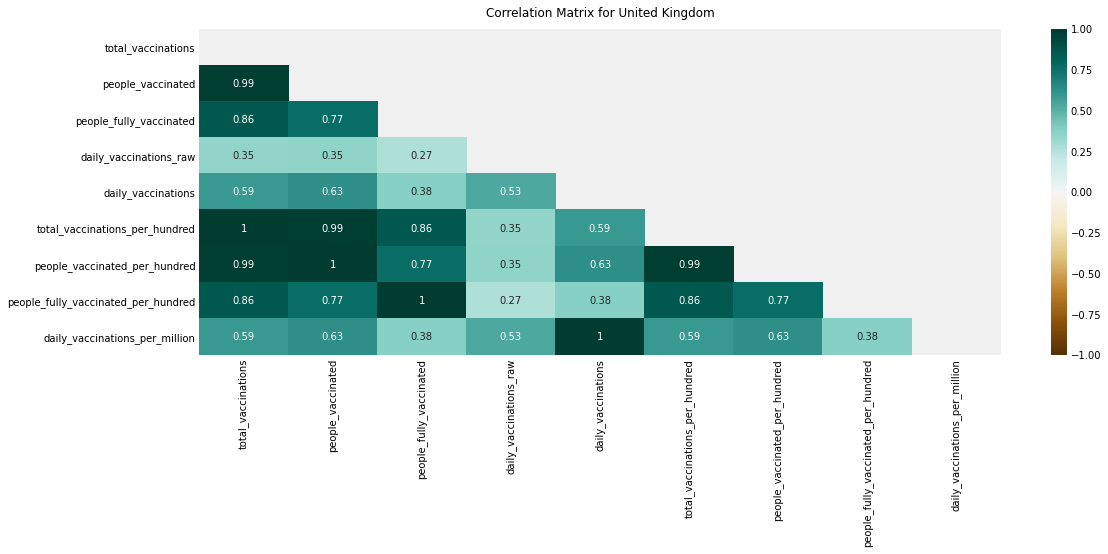

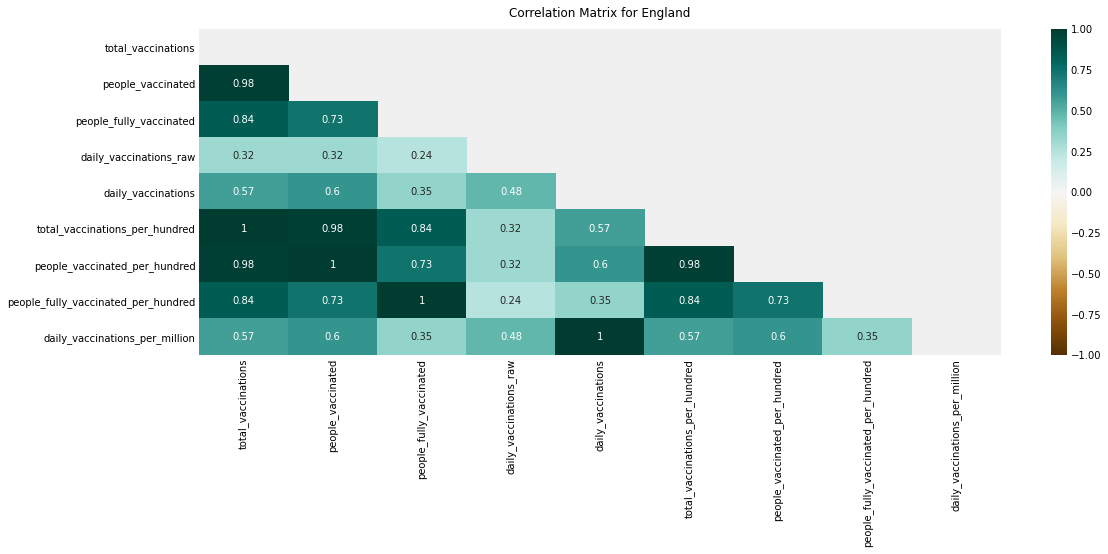

In [28]:
# Plot correlation matrix for UK
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(vaccine_uk.corr(), dtype=np.bool))
heatmap = sns.heatmap(vaccine_uk.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix for United Kingdom', fontdict={'fontsize':12}, pad=12);
# Plot correlation matrix for England
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(vaccine_eng.corr(), dtype=np.bool))
heatmap = sns.heatmap(vaccine_eng.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix for England', fontdict={'fontsize':12}, pad=12);

*  In correlation matrix, it can be seen that varaibles doesn't have a huge difference in correlation. 
*  Only varaible "fully vaccinated people" has a slight difference for 3 points. Other varaibles have about 2 points difference

In [29]:
#Create a dataframe describing major variables
data = {'ISO Code' : [vaccine_uk['iso_code'].mode(), vaccine_eng['iso_code'].mode()],
        'Source' :  [vaccine_uk['source_name'].mode(), vaccine_eng['source_name'].mode()],
        'Source Website' : [vaccine_uk['source_website'].mode(), vaccine_eng['source_website'].mode()],
        'Vaccine types' : [vaccine_uk['vaccines'].mode(), vaccine_eng['vaccines'].mode()],
        'Total Vaccinations' : [vaccine_uk['total_vaccinations'].mean(), vaccine_eng['total_vaccinations'].mean()],
        'Daily Vaccinations' : [vaccine_uk['daily_vaccinations'].mean(), vaccine_eng['daily_vaccinations'].mean()],
        'People fully vaccinated per hundred' : [vaccine_uk['people_fully_vaccinated_per_hundred'].mean(), vaccine_eng['people_fully_vaccinated_per_hundred'].mean()]}
df = pd.DataFrame(data, index =['United Kingdom', 'England'])
df

ISO Code  ... People fully vaccinated per hundred
United Kingdom       0    GBR
dtype: object  ...                            4.099519
England         0    OWID_ENG
dtype: object  ...                            4.006058

[2 rows x 7 columns]

# **What vaccination schemes (combination of vaccines) are used and in which countries?**
*   Multiple Vaccines
*   Single Vaccine

In [30]:
total_vacc_sorted = vaccine.sort_values(by = 'total_vaccinations', ascending = False).reset_index()
countries_total_vac = total_vacc_sorted.country.to_list()
top5_vaccine = total_vacc_sorted[total_vacc_sorted['country'].isin(countries[:5])]

In [31]:
top5_vaccine[['country', 'vaccines']].value_counts().values

array([104, 104,  96,  66,  65])

In [32]:
#Create a dataframe for multiple vaccines used countries
temp = top5_vaccine[['country', 'vaccines']].value_counts()
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)
values = [104, 104, 96, 66, 65]
temp['Counts'] = values
temp

country                                   vaccines    0  Counts
0         England        Oxford/AstraZeneca, Pfizer/BioNTech  104     104
1  United Kingdom        Oxford/AstraZeneca, Pfizer/BioNTech  104     104
2   United States  Johnson&Johnson, Moderna, Pfizer/BioNTech   96      96
3          Brazil                Oxford/AstraZeneca, Sinovac   66      66
4           India                Covaxin, Oxford/AstraZeneca   65      65

In [33]:
data = px.data.gapminder()
fig = px.bar(temp, x='vaccines', y='country',
            color='vaccines', height=400, 
            text='Counts', title = 'Multiple vaccines used in top vaccinated countries: ') 
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')       
fig.show()

*   The bar plot shows that UK and England in 100's, we can conclude that these two data have same information.
*   USA is using multiple vaccibe manufacturers: 
    *  Johson&Johnson
    *   Moderna
    *   Pfizer/BionTech
*   Brazil and India is actively using vaccine from AstraZeneca


**Single Vaccine Analysis:**

In [34]:
total_vaccine_ = man.groupby('vaccine')['total_vaccinations'].sum().sort_values(ascending=False)

In [35]:
total_vaccine = total_vaccine_/1000000
total_vaccine = total_vaccine_[:5]
total_vaccine = pd.DataFrame(total_vaccine)
total_vaccine.reset_index(inplace=True)
total_vaccine

vaccine  total_vaccinations
0     Pfizer/BioNTech          7395223999
1             Moderna          4782250400
2             Sinovac           517222478
3  Oxford/AstraZeneca           433074716
4     Johnson&Johnson           206851394

In [36]:
# df = px.data.tips()
fig = px.pie(total_vaccine, values='total_vaccinations', names='vaccine', title='Vaccines based on the total vaccinations:')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*   Pfizer/BionTech is vastly used vaccine manufacturer with total vaccinations of 55.5 percent 
*   Second largest is Moderna with 35.9 percent
*   The least one is Johnson&Johson. However more than 6.8 million vaccines adminsitered by J&J. 
Source: [CDC](https://https://www.cdc.gov/coronavirus/2019-ncov/vaccines/different-vaccines/janssen.html)

# **What is the vaccine used in the largest number of countries?**

In [37]:
#Crosstab with country against vaccine manufacturer
country_vac_type = pd.crosstab(man.location,man.vaccine)
country_vac_type.reset_index(inplace=True)
country_vac_type

vaccine       location  Johnson&Johnson  ...  Pfizer/BioNTech  Sinovac
0                Chile                0  ...              122       82
1              Czechia                4  ...              120        0
2               France                2  ...              119        0
3              Germany                0  ...              120        0
4              Iceland                0  ...              114        0
5                Italy                4  ...              120        0
6               Latvia                0  ...               95        0
7            Lithuania                1  ...              113        0
8              Romania                0  ...              120        0
9        United States               49  ...               99        0

[10 rows x 6 columns]

In [38]:
# Mostly used vaccine by countries
#Pfizer/BioNTech
fig = px.bar(country_vac_type, x="Pfizer/BioNTech", 
             y="location", 
             color='Pfizer/BioNTech', 
             orientation='h',
             height=400,
             title='The vaccine: Pfizer/Biontech')
fig.show()

#Oxford/AstraZeneca
fig = px.bar(country_vac_type, x="Oxford/AstraZeneca", 
             y="location", 
             color='Oxford/AstraZeneca', 
             orientation='h',
             height=400,
             title='The vaccine: Oxford/AstraZeneca')
fig.show()

#Moderna
fig = px.bar(country_vac_type, x="Moderna", 
             y="location", 
             color='Moderna', 
             orientation='h',
             height=400,
             title='The vaccine: Moderna')
fig.show()

**Conclusion:**

1. **What country has vaccinated more people?**
* USA, India, UK, and Brazil are top countries in daily vaccination
* Israel, Gibraltar, USA, Chile and Bahrain are top performers in fully vaccinated people per hundrerd
*  There is a moderate decrease in vaccination in India. Since coronavirus cases rose dramatically over the past few days, its accepted that vaccinations dropped, as the country in complete lockdown.

2. ***What vaccination schemes (combination of vaccines) are used and in which countries?***
*  USA is using multiple vaccine manufacturers: Johson&Johnson, Moderna, Pfizer/BionTech
*  Brazil and India is actively using vaccine from AstraZeneca
*  Pfizer/BionTech is vastly used vaccine manufacturer with total vaccinations of 55.5 percent. Second largest is Moderna with 35.9 percent

3. ***What is the vaccine used in the largest number of countries?***
*  Among top 10 countries, only Chile administred vaccined from Sinovac
*  USA did not provide any AstraZeneca vaccine
*  USA administered the largest portion of J&J vaccines